## Fitting drug response curves with sigmoid function

1. Test different fitting function:
2. visualise fitting and analyse errors
3. Make visualisation of absolute and relative methods of estimaton of IC50

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

In [2]:
import os
os.listdir("results")

['filt_auc_limit_02.csv',
 'fit_1234.csv',
 'filt_auc_limit_04.csv',
 'filt_1234.csv',
 'filt_auc_limit_06.csv',
 'fit_auc_02.csv',
 'fit_auc_04.csv',
 'fit_auc_06.csv',
 'filt_auc.csv',
 'filt_auc_06.csv',
 'filt_auc_04.csv',
 'filt_123.csv',
 'filt_auc_02.csv',
 '.ipynb_checkpoints',
 'fit_123.csv']

## Fitting data

In [3]:
df = pd.read_csv("results/filt_auc.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 122642/122642 [11:28:18<00:00,  2.97it/s]      


<function sigmoid_4_param at 0x7fd2cd2d07b8>
R2>0: (105039, 32)
R2>0.9 39161
Number of samples with fitting <0.1: 20318

CPU times: user 11min 52s, sys: 46 s, total: 12min 38s
Wall time: 11h 28min 19s


### sigmoid_2_param

100%|██████████| 105039/105039 [03:52<00:00, 451.00it/s]


<function sigmoid_2_param at 0x7fd2cb00c2f0>
R2>0: (105039, 34)
R2>0.9 26914
CPU times: user 3min 23s, sys: 8.45 s, total: 3min 31s
Wall time: 3min 53s


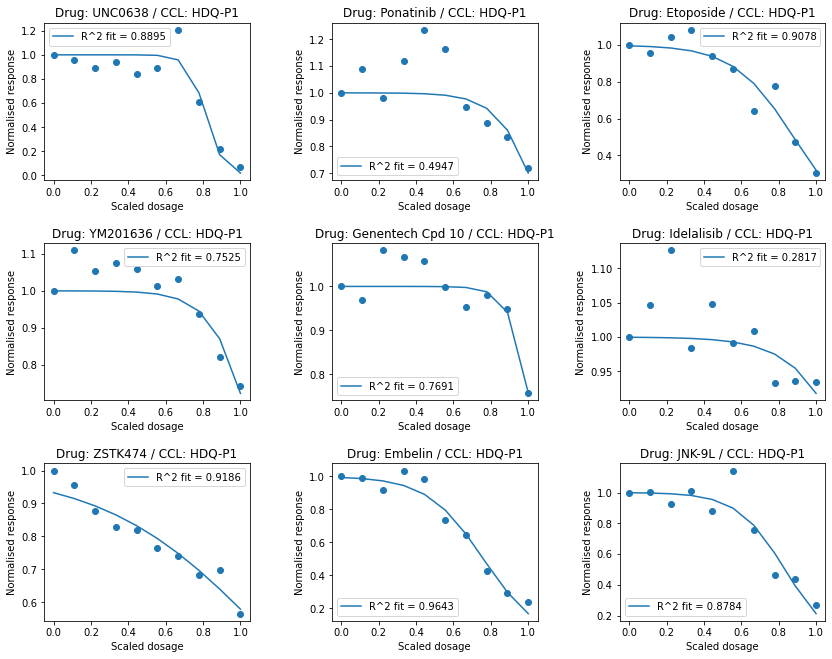

In [8]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 105039/105039 [06:23<00:00, 273.87it/s]


<function sigmoid_3_param at 0x7fd2cd2d0510>
R2>0: (105000, 36)
R2>0.9 36604
CPU times: user 5min 41s, sys: 15.5 s, total: 5min 57s
Wall time: 6min 24s


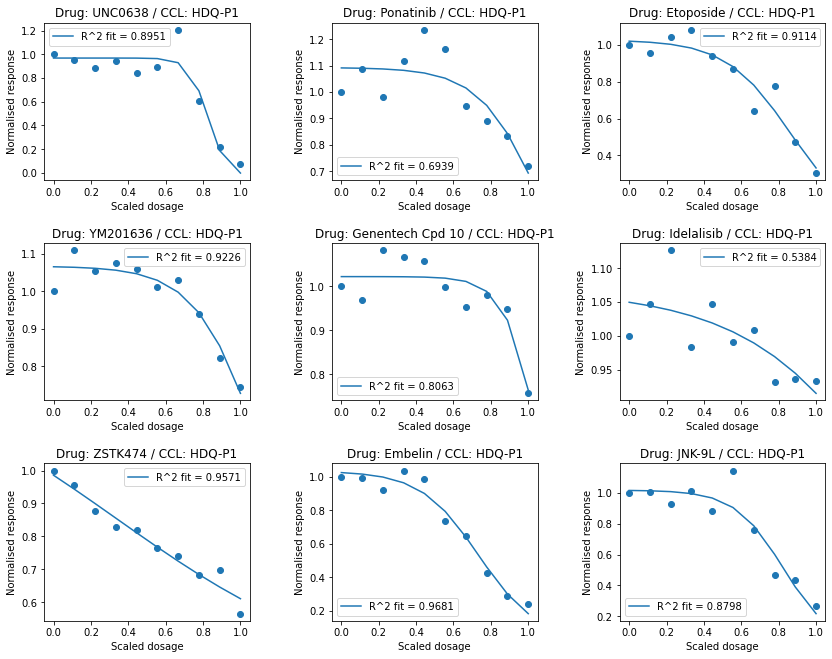

In [9]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 105000/105000 [04:38<00:00, 377.01it/s]


<function fsigmoid at 0x7fd2cd1f21e0>
(105000, 38)


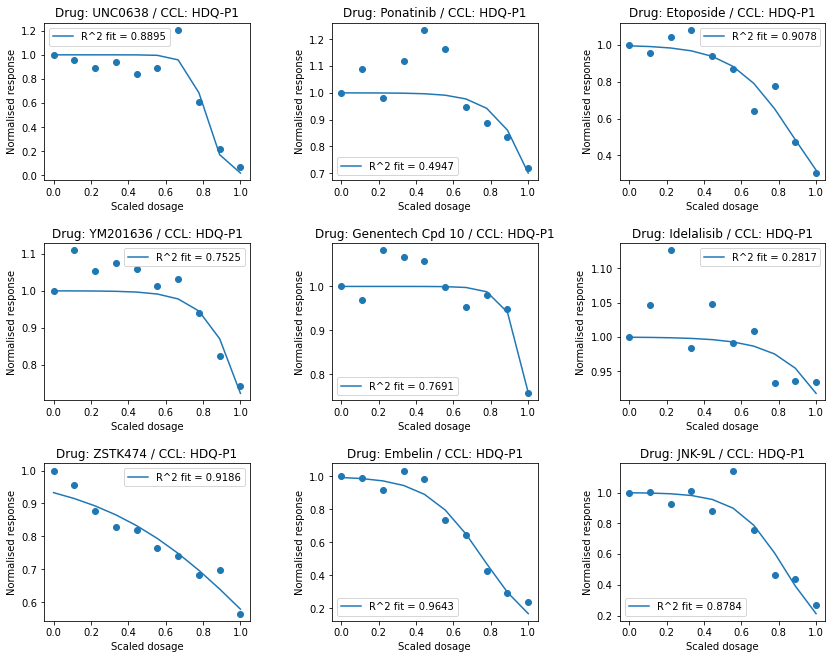

In [10]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 105000/105000 [12:38<00:00, 138.51it/s]


<function logistic_4_param at 0x7fd2cd2d0950>
R2>0: (101267, 40)
R2>0.9 42613
CPU times: user 10min 50s, sys: 33 s, total: 11min 23s
Wall time: 12min 39s


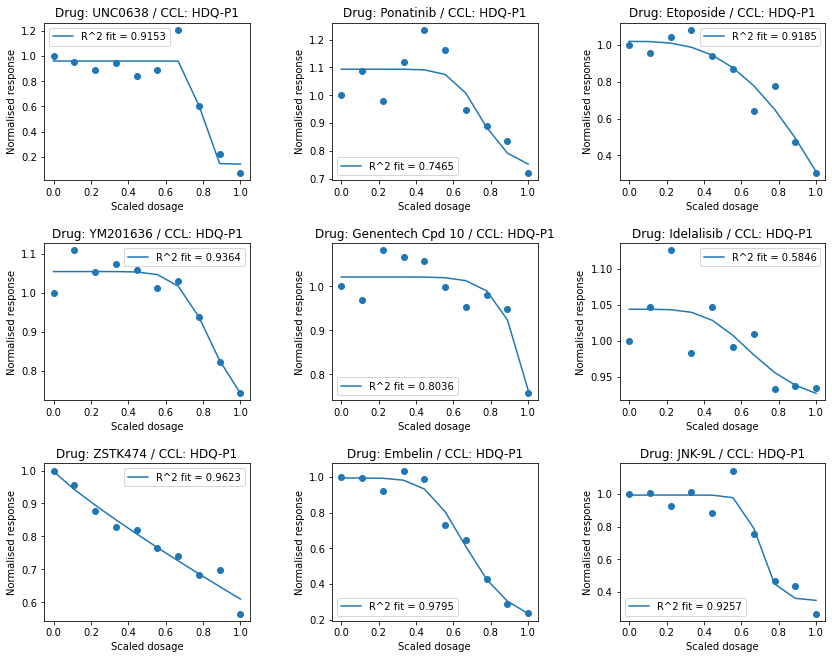

In [11]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### LL4_4_param

100%|██████████| 101267/101267 [11:26<00:00, 147.60it/s]


<function ll4_4_param at 0x7fd2cd2d0840>
R2>0: (99819, 42)
R2>0.9 42525
CPU times: user 10min 11s, sys: 32.7 s, total: 10min 43s
Wall time: 11min 27s


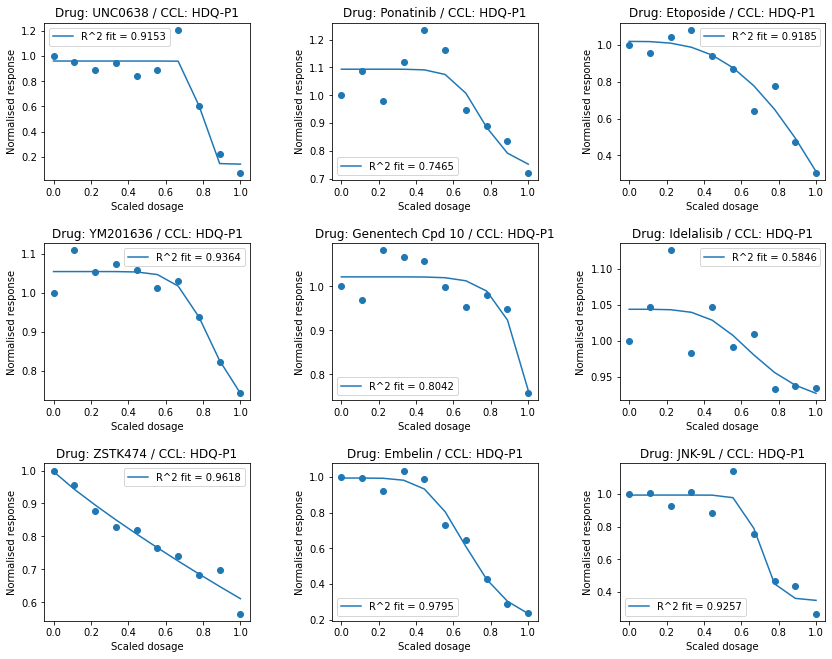

In [12]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 99819/99819 [07:22<00:00, 225.79it/s]


<function ll4R_4_param at 0x7fd2cd2d08c8>
R2>0: (99443, 44)
R2>0.9 42402
CPU times: user 7min 5s, sys: 22.4 s, total: 7min 27s
Wall time: 7min 22s


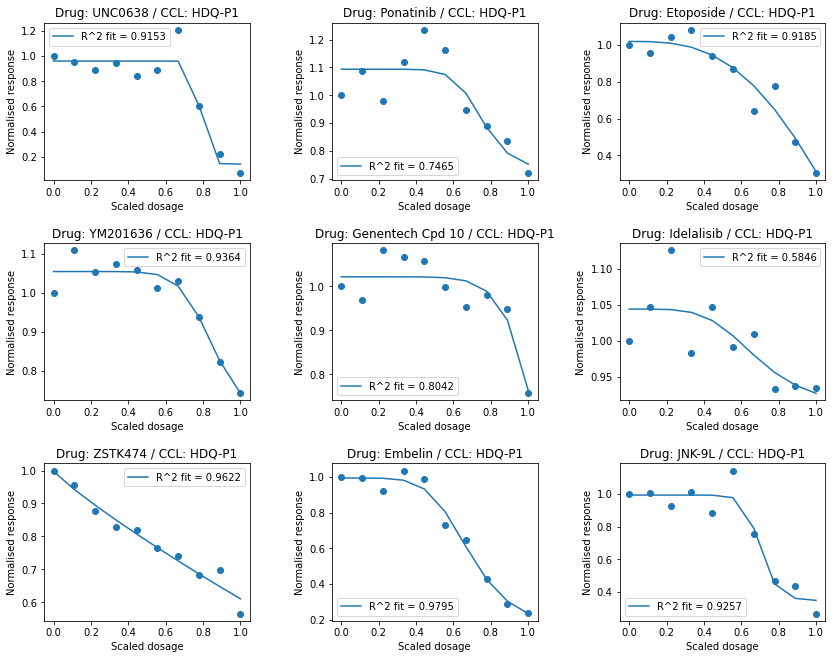

In [13]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 99443/99443 [14:17<00:00, 115.94it/s]


<function logLogist_3_param at 0x7fd2cd2d09d8>
R2>0: (98703, 46)
R2>0.9 39680
CPU times: user 12min 30s, sys: 42.3 s, total: 13min 13s
Wall time: 14min 18s


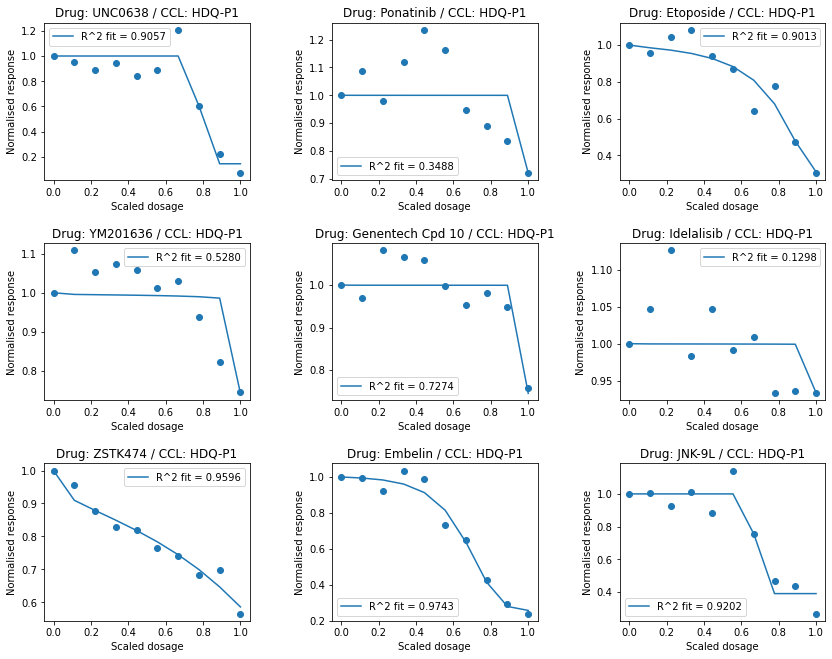

In [14]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [15]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [16]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,sigmoid_4_param_r2,ll4_4_param_r2,sigmoid_3_param_r2,logistic_4_param_r2,fsigmoid_r2,sigmoid_2_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
0,0.915267,0.915344,0.895082,0.915344,0.889460,0.889460,0.915344,0.905693,ll4_4_param
1,0.737520,0.746528,0.693874,0.746528,0.494719,0.494719,0.746527,0.348756,logistic_4_param
2,0.913683,0.918474,0.911393,0.918478,0.907841,0.907841,0.918464,0.901337,logistic_4_param
3,0.937524,0.936430,0.922580,0.936430,0.752543,0.752543,0.936430,0.527989,sigmoid_4_param
5,0.810633,0.804155,0.806331,0.803561,0.769099,0.769099,0.804237,0.727443,sigmoid_4_param


In [17]:
df["better_fitting"].value_counts()

logLogist_3_param    29054
sigmoid_4_param      17383
ll4R_4_param         16839
logistic_4_param     16550
ll4_4_param          16049
sigmoid_3_param       2643
sigmoid_2_param        124
fsigmoid                61
Name: better_fitting, dtype: int64

In [18]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
logistic_4_param,14121
ll4_4_param,14117
ll4R_4_param,14056
sigmoid_4_param,13450
logLogist_3_param,11969
sigmoid_3_param,8513
fsigmoid,5074
sigmoid_2_param,5022


In [19]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,28672
ll4_4_param,28660
ll4R_4_param,28570
sigmoid_4_param,26705
logLogist_3_param,26292
sigmoid_3_param,21690
fsigmoid,14574
sigmoid_2_param,14495


In [20]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,42545
ll4_4_param,42467
ll4R_4_param,42356
logLogist_3_param,39680
sigmoid_4_param,39071
sigmoid_3_param,36573
fsigmoid,26966
sigmoid_2_param,26899


In [22]:
df.to_csv("results/fit_auc.csv", index=False)